## Problem Statement

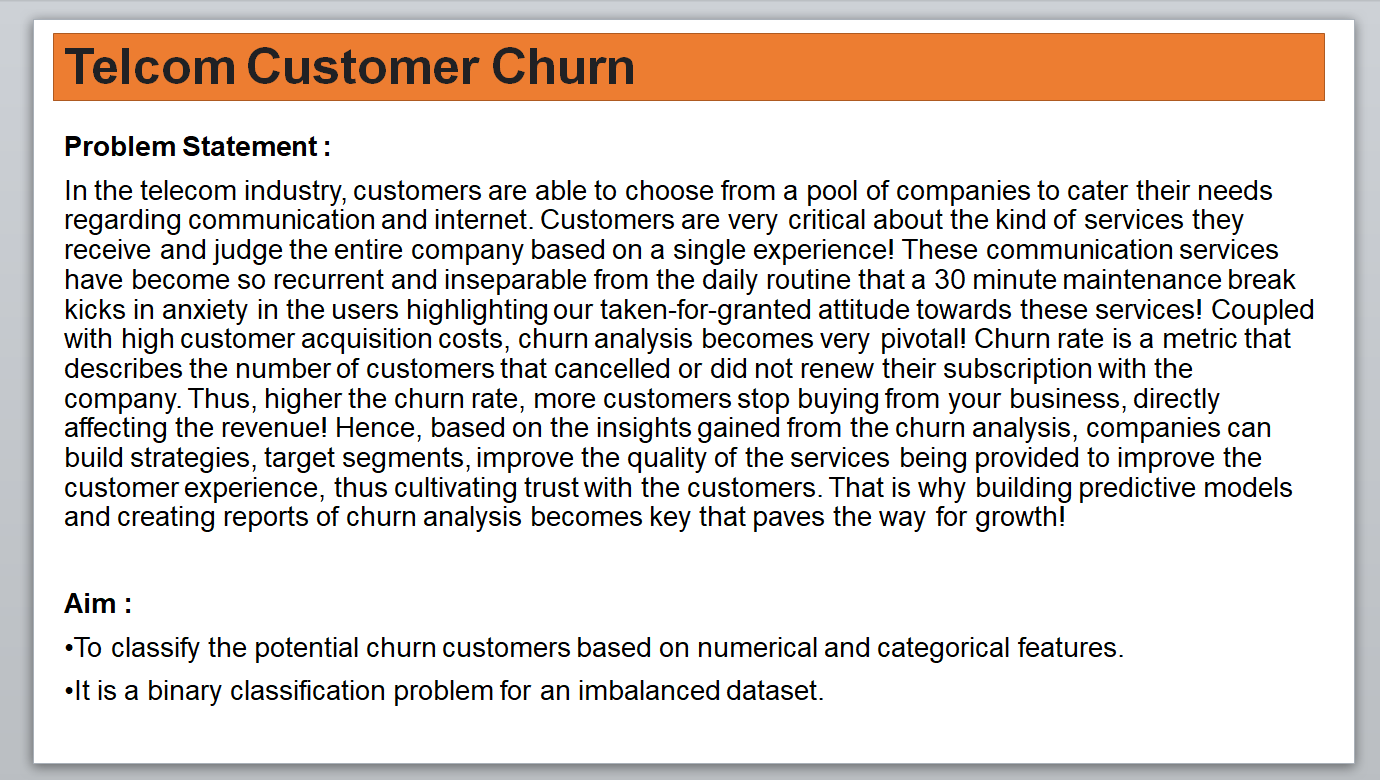

## Pre - requisite Libraries

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

## Data Dictionary

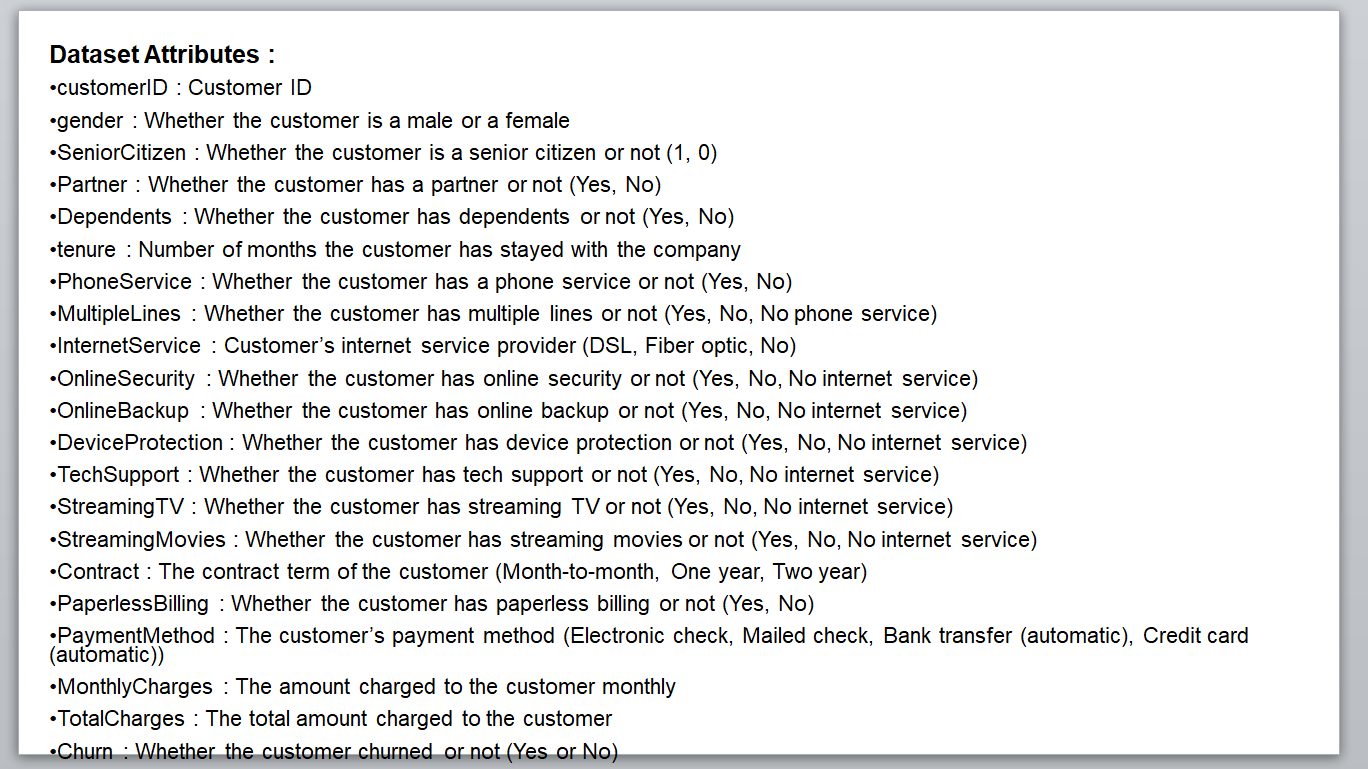

### Import Dataset

In [29]:
df = pd.read_excel('C:\\Users\\Lenovo\\Downloads\\Telecom.xlsx')
#df = pd.read_excel('/content/Telecom.xlsx')

In [30]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# Exploratory Data Analysis

#### Shape

In [31]:
df.shape

(7043, 21)

#### Columns

In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Info

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Check Duplicates

In [34]:
df.duplicated().sum()

0

#### Unique values

In [35]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Check with missing values

In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Visulaization of Missing values

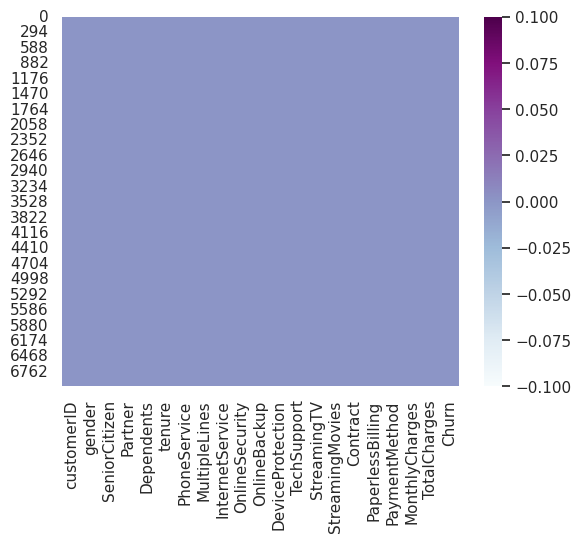

In [37]:
sns.heatmap(df.isnull() ,  cbar = True , cmap = 'BuPu')
plt.show()

### Understanding the variables

### Describe

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Columns

In [39]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


##### Insights : Total charges are also showing numeric data then why is it not showing in describe because its Total Charges showing numerical data but its actually object in nature.

In [40]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


#### Check unique value of dataset

In [41]:
for i in df.columns:

    print('*'*30 , i , '*'*30)

    print()
    print()

    print(set(df[i].tolist()))
    #print(df[i].unique())

    print()
    print()

****************************** customerID ******************************


{'2731-GJRDG', '7382-DFJTU', '5519-NPHVG', '1930-WNXSB', '3345-PBBFH', '5370-IIVVL', '0756-MPZRL', '4143-OOBWZ', '9777-IQHWP', '2937-FTHUR', '5087-SUURX', '2325-WINES', '7176-WIONM', '5439-WIKXB', '0674-GCDXG', '5141-ZUVBH', '6772-WFQRD', '0228-MAUWC', '1104-FEJAM', '0356-OBMAC', '8498-XXGWA', '5095-AESKG', '3373-YZZYM', '7668-XCFYV', '4700-UBQMV', '3721-CNZHX', '8868-WOZGU', '0020-INWCK', '4335-UPJSI', '0454-OKRCT', '6112-KTHFQ', '8258-GSTJK', '0396-UKGAI', '7706-YLMQA', '1963-SVUCV', '1383-EZRWL', '0363-SVHYR', '8292-TYSPY', '7321-KKSDU', '4925-LMHOK', '5673-FSSMF', '9570-KYEUA', '8212-CRQXP', '4123-DVHPH', '7905-NJMXS', '7850-THJMU', '0704-VCUMB', '8410-BGQXN', '2669-OIDSD', '9114-DPSIA', '4903-UYAVB', '4067-HLYQI', '4422-QVIJA', '3797-FKOGQ', '4760-XOHVN', '4936-YPJNK', '7998-ZLXWN', '2809-ZMYOQ', '2882-DDZPG', '0329-GTIAJ', '7727-SHVZV', '4701-LKOZD', '3620-EHIMZ', '2371-KFUOG', '1428-GTBJJ', '5233-AOZUF', 

### Convert Total Charges into numerical

In [42]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

#### Insights : In TotalCharges contains " " (ambiguity value). so we apply errors = 'coerce'. so that errors = 'coerce' it make ambuigity value as Null

In [43]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = 'coerce')

In [44]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

#### Check missing values after the converting TotalCharges

In [45]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [46]:
df.isnull().sum() / len(df) * 100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

#### Handling Outliers

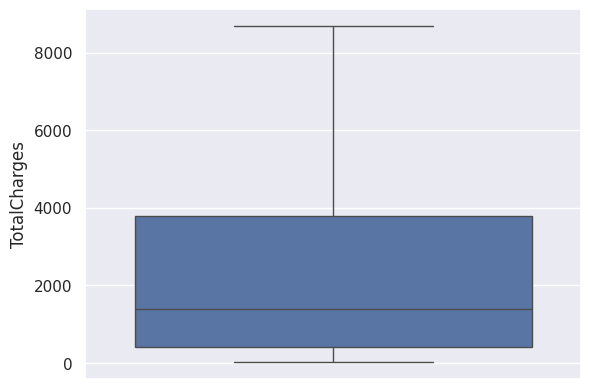

In [47]:
sns.boxplot(df['TotalCharges'])
plt.show()

#### Insights : No any single Outlier is there

### Fill missing values

In [48]:
df['TotalCharges'].skew()

0.961642499724251

#### Insights : Its Rightly skewed value means its positive skewed means skewness is there. sowe will not go with mean value so we will go with median value

In [49]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [50]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Check how much unique values are in each variable in Dataset

In [51]:
for i in df.columns:

    print(f'{i} are no of unique values are : {df[i].nunique()}' )

customerID are no of unique values are : 7043
gender are no of unique values are : 2
SeniorCitizen are no of unique values are : 2
Partner are no of unique values are : 2
Dependents are no of unique values are : 2
tenure are no of unique values are : 73
PhoneService are no of unique values are : 2
MultipleLines are no of unique values are : 3
InternetService are no of unique values are : 3
OnlineSecurity are no of unique values are : 3
OnlineBackup are no of unique values are : 3
DeviceProtection are no of unique values are : 3
TechSupport are no of unique values are : 3
StreamingTV are no of unique values are : 3
StreamingMovies are no of unique values are : 3
Contract are no of unique values are : 3
PaperlessBilling are no of unique values are : 2
PaymentMethod are no of unique values are : 4
MonthlyCharges are no of unique values are : 1585
TotalCharges are no of unique values are : 6531
Churn are no of unique values are : 2


## Data wrangling

In [52]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [53]:
print('No. of customer churning :' , df[df['Churn'] == 'Yes'].Churn.count())

No. of customer churning : 1869


#### Insights : In this dataset 1869 customers are churn

In [54]:
df_churn = df[df['Churn'] == 'Yes']

In [55]:
df_churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
print('Unique value of Multiplelines :' , df['MultipleLines'].nunique())

Unique value of Multiplelines : 3


In [57]:
print('Count of InternetService with DSL :' , df[df['InternetService'] == 'DSL'].InternetService.count())

Count of InternetService with DSL : 2421


##### Insights : 2421 customers having Phoneservice with DSL

In [58]:
print('Count of PhoneService is :', df[df['PhoneService'] == 'Yes'].PhoneService.count())

Count of PhoneService is : 6361


#### Insights : 6361 customers are having phoneservice.

#### Insights :

##### 1.In this dataset 1869 customers are churn
##### 2.Unique value of Multiplelines : 3
##### 3. Customers having Phoneservice with DSL are 2421
##### 4.Phoneservice having 6361 customers

### How Much Percentage of customers get churned

In [59]:
print('Total no. of customers :' , len(df))
print('Percentage of Customers are get churned :' , df[df['Churn']=='Yes'].Churn.count() / len(df['Churn']) * 100 , '%')

Total no. of customers : 7043
Percentage of Customers are get churned : 26.536987079369588 %


##### Insights : out of 100 % , 26.53% customers are get churned

#### Check percentage of senior citizen in dataset

In [60]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [61]:
df['SeniorCitizen'].value_counts() / len(df) * 100

SeniorCitizen
0    83.785319
1    16.214681
Name: count, dtype: float64

##### Insights :  
###### Here in dataset , 1 is  denoting for senior citizen and 0 is for not senior citizen
###### percentage of seniorcitizen is 16.21%.

#### Check percentage of partners

In [62]:
df['Partner'].value_counts() / len(df) * 100

Partner
No     51.69672
Yes    48.30328
Name: count, dtype: float64

###### Insights : 48.30% people are staying with there partner

#### How much percent of customers are depend on their parents

In [63]:
df['Dependents'].value_counts() / len(df) * 100

Dependents
No     70.041176
Yes    29.958824
Name: count, dtype: float64

##### Insights : 29.95 % customers are dependent on their parents

#### We are dropping the customerId from the dataset because customer Id is the feature is not significant for customer will churn or not

In [64]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [65]:
df.drop(columns = ['customerID'] ,axis = 1,  inplace = True)

In [66]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Data Preprocessing

#### 1. Handling the missing values

In [67]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Data Split into independent and depnedent variables

In [68]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [69]:
x.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [70]:
y.head(2)

0    No
1    No
Name: Churn, dtype: object

#### 2. Handling the characters / encoding

### Churn

In [71]:
df['Churn'].value_counts() / len(df) * 100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

##### Use where condition

In [72]:
df['Churn'] = np.where(df['Churn'] == 'Yes' , 1 , 0)

In [73]:
df['Churn'].value_counts() / len(df) * 100

Churn
0    73.463013
1    26.536987
Name: count, dtype: float64

In [74]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [75]:
y = df.iloc[: , -1]

In [76]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

#### Most of the features contain more than two or two categories so we are go with one hot encoder

In [77]:
x = pd.get_dummies(x , columns = ['gender' , 'Partner' , 'Dependents' , 'PhoneService' ,
                               'MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' ,
                               'DeviceProtection', 'TechSupport' ,'StreamingTV' , 'StreamingMovies' ,
                              'Contract' , 'PaperlessBilling' , 'PaymentMethod'] , drop_first = True)

In [78]:
x.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [79]:
x.shape

(7043, 30)

In [80]:
x.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Insights : by understanding of describe  , we get to know we have only needed feature scaling of tenure , MonthlyCharges , TotalCharges. because rest of feature are in between 0 and 1 . (min and max) so  we just need to of these three features are bring into -3 to +3. so we applied feature scaling on these three only

### 4.Feature Scaling

In [81]:
scaler = StandardScaler()

In [82]:
x[['tenure' ,'MonthlyCharges' , 'TotalCharges']] = scaler.fit_transform(x[['tenure' ,'MonthlyCharges' , 'TotalCharges']])

In [83]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.128655,True,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,1.613701,1.277533,2.243151,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,-0.870241,-1.168632,-0.854469,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,-1.155283,0.320338,-0.872062,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [84]:
x.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03
mean,0.162147,-2.421273e-17,-6.406285e-17,-1.488074e-17
std,0.368612,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,-1.318165e+00,-1.545860e+00,-9.991203e-01
25%,0.000000,-9.516817e-01,-9.725399e-01,-8.298459e-01
50%,0.000000,-1.372744e-01,1.857327e-01,-3.904632e-01
75%,0.000000,9.214551e-01,8.338335e-01,6.642871e-01
max,1.000000,1.613701e+00,1.794352e+00,2.826743e+00


### We check Significance of variable by feature Importance Score

#### RandomForestClassifier

In [85]:
rf_label = RandomForestClassifier()

In [86]:
rf_label.fit(x , y)

RandomForestClassifier()

In [87]:
pd.DataFrame({"Features" : x.columns , "RF Feature Importance Score" : rf_label.feature_importances_}).sort_values(by = "RF Feature Importance Score" , ascending = False)

,Features,RF Feature Importance Score
3,TotalCharges,0.197404
2,MonthlyCharges,0.171480
1,tenure,0.169515
10,InternetService_Fiber optic,0.037925
28,PaymentMethod_Electronic check,0.037520
25,Contract_Two year,0.032114
4,gender_Male,0.027528
26,PaperlessBilling_Yes,0.025556
13,OnlineSecurity_Yes,0.024584
5,Partner_Yes,0.023868


In [88]:
# 12 	OnlineSecurity_No internet service 	0.005611
# 16 	DeviceProtection_No internet service 	0.005450  ##
# 22 	StreamingMovies_No internet service 	0.004873
# 14 	OnlineBackup_No internet service 	0.004779  ##
# 20 	StreamingTV_No internet service 	0.004649  ##
# 18 	TechSupport_No internet service 	0.004309
# 7 	PhoneService_Yes 	0.004015
# 8 	MultipleLines_No phone service 	0.003819
# 11 	InternetService_No 	0.003457

### XGBClassifier

In [89]:
xgb_label = XGBClassifier()

In [90]:
xgb_label

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
xgb_label.fit(x , y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [92]:
pd.DataFrame({"Features" : x.columns , "XGB feature Importance Score" : xgb_label.feature_importances_}).sort_values(by = 'XGB feature Importance Score' , ascending = False )

,Features,XGB feature Importance Score
10,InternetService_Fiber optic,0.357062
25,Contract_Two year,0.190460
11,InternetService_No,0.146664
24,Contract_One year,0.065230
23,StreamingMovies_Yes,0.027286
1,tenure,0.022775
7,PhoneService_Yes,0.018609
28,PaymentMethod_Electronic check,0.014243
9,MultipleLines_Yes,0.014097
21,StreamingTV_Yes,0.013260


In [93]:
# OnlineSecurity_No internet service 	0.005611
# 16 	DeviceProtection_No internet service 	0.005450 ##
# 22 	StreamingMovies_No internet service 	0.004873
# 14 	OnlineBackup_No internet service 	0.004779  ##
# 20 	StreamingTV_No internet service 	0.004649  ##
# 18 	TechSupport_No internet service 	0.004309
# 7 	##PhoneService_Yes 	0.004015
# 8 	MultipleLines_No phone service 	0.003819
# 11 	##InternetService_No 	0.003457

### GradientBoostingClassifier

In [94]:
gb_label = GradientBoostingClassifier()

In [95]:
gb_label

GradientBoostingClassifier()

In [96]:
gb_label.fit(x , y)

GradientBoostingClassifier()

In [97]:
pd.DataFrame({"Features" :  x.columns , "GB Feature Importance Score" : gb_label.feature_importances_}).sort_values(by = "GB Feature Importance Score" , ascending = False)

,Features,GB Feature Importance Score
1,tenure,0.304648
10,InternetService_Fiber optic,0.196627
28,PaymentMethod_Electronic check,0.104594
25,Contract_Two year,0.079995
3,TotalCharges,0.070767
2,MonthlyCharges,0.061763
24,Contract_One year,0.059587
26,PaperlessBilling_Yes,0.019549
13,OnlineSecurity_Yes,0.017204
19,TechSupport_Yes,0.013176


In [98]:
# 14 	OnlineBackup_No internet service 	0.005597  ##
# 9 	MultipleLines_Yes 	0.005381
# 8 	MultipleLines_No phone service 	0.004399
# 12 	OnlineSecurity_No internet service 	0.004188
# 21 	StreamingTV_Yes 	0.004079
# 6 	Dependents_Yes 	0.003108
# 7 	PhoneService_Yes 	0.003088
# 4 	gender_Male 	0.001995
# 15 	OnlineBackup_Yes 	0.001323
# 11 	InternetService_No 	0.001307
# 27 	PaymentMethod_Credit card (automatic) 	0.001244
# 17 	DeviceProtection_Yes 	0.000729
# 20 	StreamingTV_No internet service 	0.000225  ##
# 29 	PaymentMethod_Mailed check 	0.000153
# 16 	DeviceProtection_No internet service 	0.000000  ##
# 5 	Partner_Yes 	0.000000

## Common less signficant features from all 3 features Importance test

##### 16 	DeviceProtection_No internet service 	0.005450
##### 14 	OnlineBackup_No internet service 	0.004779
##### 20 	StreamingTV_No internet service 	0.004649

#### Drop this three less signgificant variables from dataset

In [99]:
x.drop(['DeviceProtection_No internet service' , 'OnlineBackup_No internet service' , 'StreamingTV_No internet service' ], axis = 1 , inplace = True)

In [100]:
x.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


### 5. Data Balancing

In [101]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [102]:
major_class = y[y == 0].count()
minor_class = y[y==1].count()

In [103]:
print('Major_class :' ,major_class , '&' , 'minor_class :' ,minor_class)

Major_class : 5174 & minor_class : 1869


In [104]:
if minor_class * 2 <= major_class:

    print('Data Imbalance')

else:
    print('Data Balance')

Data Imbalance


#### SMOTE

In [105]:
smote = SMOTE()

In [106]:
x_smote  , y_smote = smote.fit_resample(x , y)

In [107]:
x_smote.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [108]:
y_smote.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [109]:
print('Count before Data Balance :')
print(y.value_counts())
print('**' * 40)
print('Count after Data Balance :')
print(y_smote.value_counts())

Count before Data Balance :
Churn
0    5174
1    1869
Name: count, dtype: int64
********************************************************************************
Count after Data Balance :
Churn
0    5174
1    5174
Name: count, dtype: int64


### Data Split into train and test

In [110]:
x_train , x_test  , y_train , y_test = train_test_split(x_smote , y_smote , test_size = 0.25 , random_state = 2)

In [111]:
print(x_train.shape , x_test.shape  , y_train.shape , y_test.shape)

(7761, 27) (2587, 27) (7761,) (2587,)


### Data Preprocessing Completed

## Model building

### RandomForestClassifier

In [112]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)
print('Training Accuracy of randomforest is :' , accuracy_score(y_train , y_train_pred_rf))
print('Testing Accuracy of randomforest is :' , accuracy_score(y_test , y_test_pred_rf))
print('Training confusion matrix is :')
print(confusion_matrix(y_train , y_train_pred_rf))
print('Testing confusion matrix is :' )
print(confusion_matrix(y_test , y_test_pred_rf))
print('Classification Report of training :')
print(classification_report(y_train , y_train_pred_rf))
print('Classification report of testing :' )
print(classification_report(y_test , y_test_pred_rf))

Training Accuracy of randomforest is : 0.9987115062491947
Testing Accuracy of randomforest is : 0.8531117124081948
Training confusion matrix is :
[[3855    8]
 [   2 3896]]
Testing confusion matrix is :
[[1079  232]
 [ 148 1128]]
Classification Report of training :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       1.00      1.00      1.00      3898

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761

Classification report of testing :
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1311
           1       0.83      0.88      0.86      1276

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



#### Insights : RandomForest is overfitted because it get variance in training and testing accuracy is more than 10%.

### Cross validation

In [113]:
cv_rf = cross_val_score(rf , x_train , y_train , cv = 10)

In [114]:
cv_rf

array([0.83140283, 0.82989691, 0.84536082, 0.82860825, 0.83505155,
       0.83376289, 0.83634021, 0.84149485, 0.81314433, 0.84536082])

In [115]:
training_accuracy_rf = cv_rf.mean()

In [116]:
training_accuracy_rf

0.8340423449959532

In [117]:
print('Training Accuracy of randomforest is :' , training_accuracy_rf)
print('Testing Accuracy of randomforest is :' , accuracy_score(y_test , y_test_pred_rf))

Training Accuracy of randomforest is : 0.8340423449959532
Testing Accuracy of randomforest is : 0.8531117124081948


### XGBClassifier

In [118]:
xgb = XGBClassifier()
xgb.fit(x_train , y_train)
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb =  xgb.predict(x_test)
print('Training Accuracy of XGBoost :' , accuracy_score(y_train , y_train_pred_xgb))
print('Testing Accuracy of XGBoost :' , accuracy_score(y_test , y_test_pred_xgb))
print('Training confusion matrix :')
print(confusion_matrix(y_train , y_train_pred_xgb))
print('Testing confusion matrix :')
print(confusion_matrix(y_test , y_test_pred_xgb))
print('Classification Report of training :')
print(classification_report(y_train , y_train_pred_xgb))
print('Classification Report of testing :')
print(classification_report(y_test , y_test_pred_xgb))

Training Accuracy of XGBoost : 0.9364772580852982
Testing Accuracy of XGBoost : 0.8407421724004639
Training confusion matrix :
[[3526  337]
 [ 156 3742]]
Testing confusion matrix :
[[1070  241]
 [ 171 1105]]
Classification Report of training :
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3863
           1       0.92      0.96      0.94      3898

    accuracy                           0.94      7761
   macro avg       0.94      0.94      0.94      7761
weighted avg       0.94      0.94      0.94      7761

Classification Report of testing :
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1311
           1       0.82      0.87      0.84      1276

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587



#### Insights : XGBClassifier get more than 10% difference in training and testing accuracy means overfitting issue.

### cross validation on XGBClassifier

In [119]:
cv = cross_val_score(xgb , x_train , y_train , cv = 10)

In [120]:
print(cv)

[0.81081081 0.80283505 0.83247423 0.82603093 0.82860825 0.82474227
 0.80798969 0.82603093 0.79896907 0.8492268 ]


In [121]:
training_accuracy_xgb = cv.mean()

In [122]:
training_accuracy_xgb

0.8207718027305655

In [123]:
print('Training Accuracy of XGBoost :' , training_accuracy_xgb)
print('Testing Accuracy of XGBoost :' , accuracy_score(y_test , y_test_pred_xgb))

Training Accuracy of XGBoost : 0.8207718027305655
Testing Accuracy of XGBoost : 0.8407421724004639


#### Here we perform cross validation technique to aviod overfitting but actually it just reduce the difference of accuracies it not make any change in your x_train and y_train values Actual values) so your other performane matrices are still not changed. so cross validation is not good approach . here we will use some advance deep learning techniques so thats why we are not focusing on ML algorithms but when you face underfitting or overfitting problems then you can switch the algorithm or you can use hyper parameter tuning.

## Deep Learning Approach - MultiLayer Perceptron Method

##### First of all we install tensorflow then we import tensorflow in local jupyter notebook then
##### from tensorflow we import keras and from keras.layers we import everything and from keras
##### we import sequential model.

In [124]:
model = Sequential()

In [125]:
model

In [126]:
x_train.shape

(7761, 27)

In [ ]:
model = Sequential()
model.add(Dense(32 , input_shape = (27 ,) , activation = 'relu'))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.fit(x_train , y_train , batch_size = 32 , epochs = 100 , validation_data = (x_test , y_test))

## H2O AutoML Model

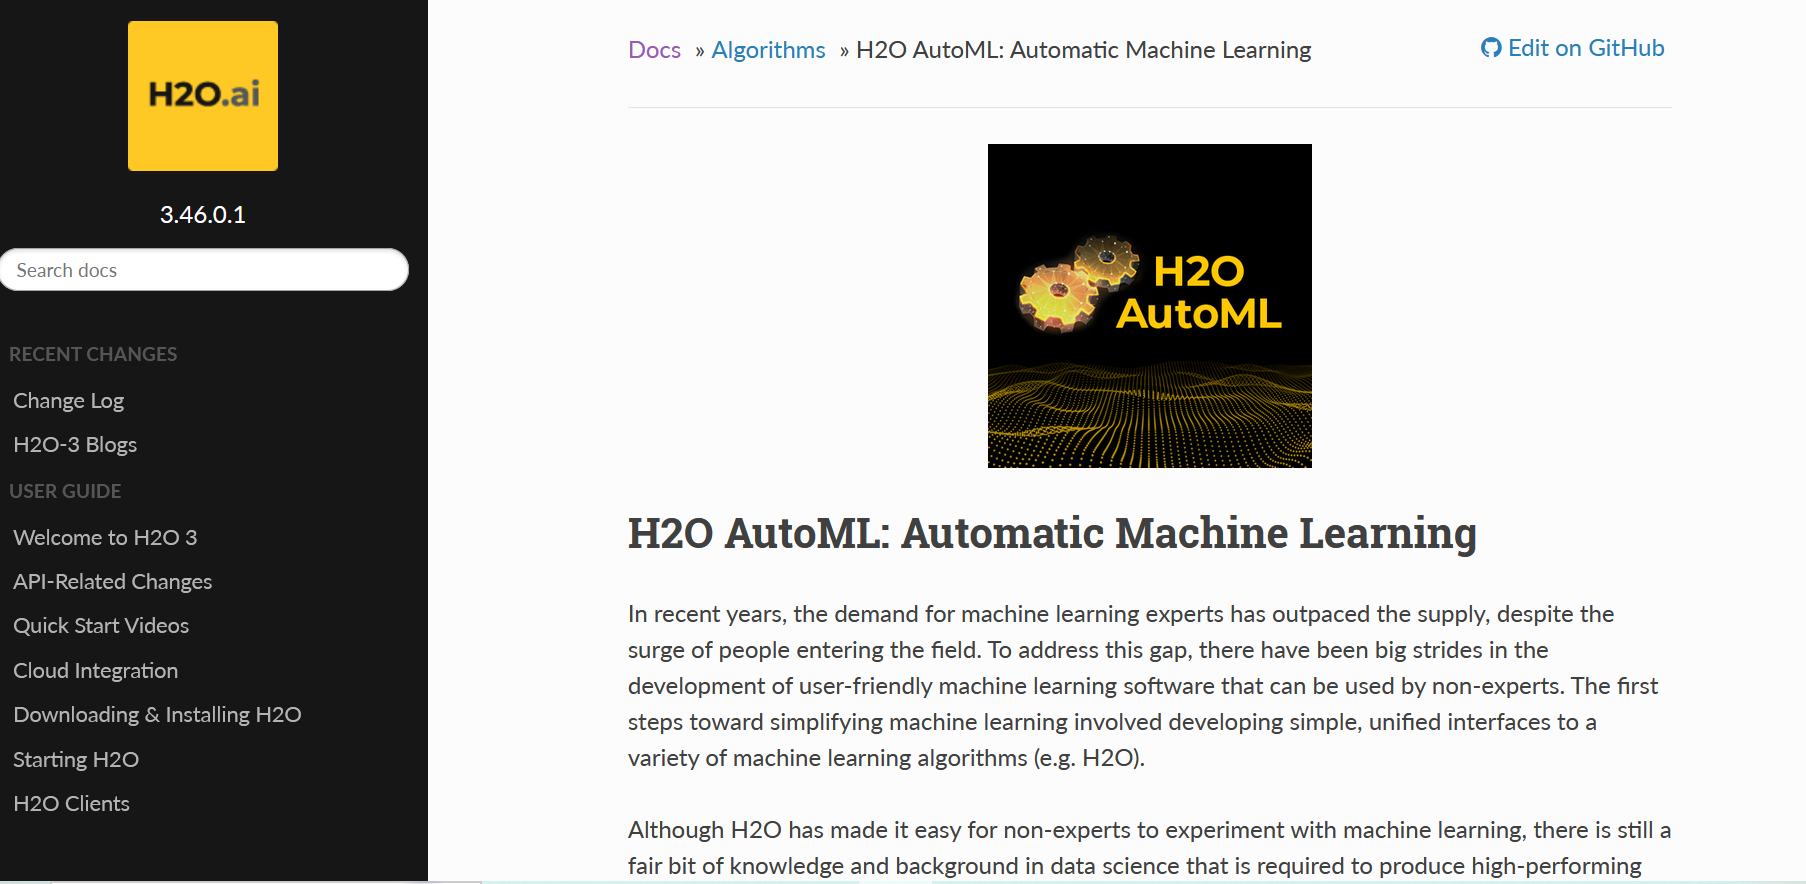
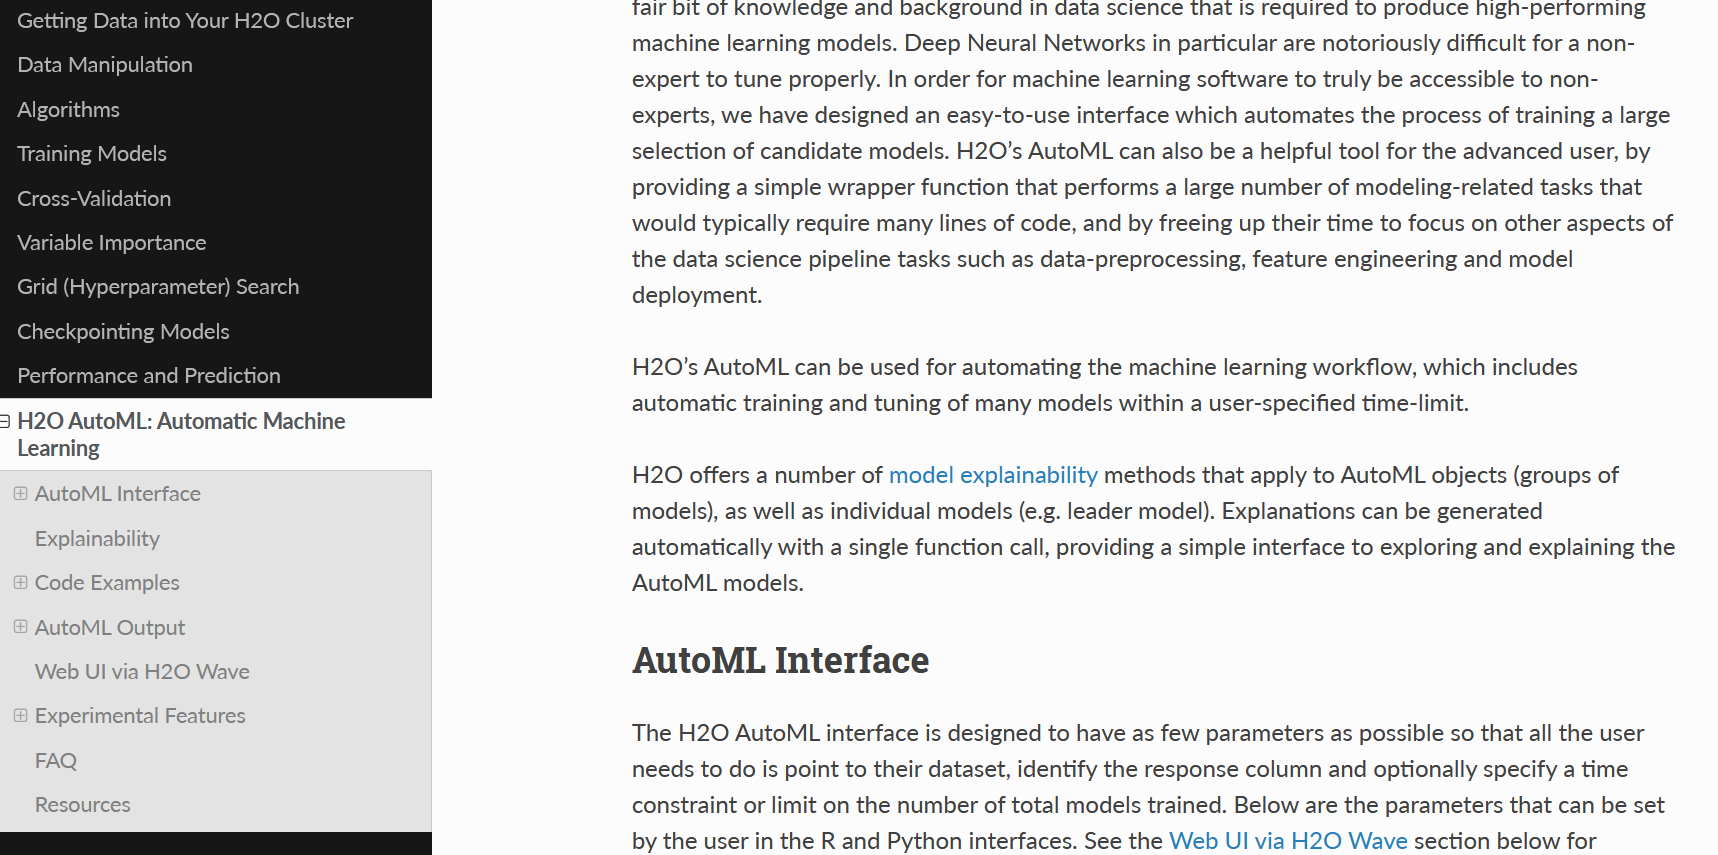

## H20.AI

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>= 0.3.8"
!pip install future

In [ ]:
!pip install h2o

In [130]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size = '16G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 mins 22 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"21 days, 19 hours and 44 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_9hett5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**Loading The Dataset**

In [136]:
dataset = h2o.import_file("/content/Telecom(1).csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [137]:
dataset.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### **Split the dataset in train and test**

#### **80% data for training and 20% data for testing**

In [138]:
df_train , df_test = dataset.split_frame(ratios = [0.8])

In [139]:
df_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [140]:
df_test

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.7,7382.25,No
4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.9,No
3638-WEABW,Female,0,Yes,No,58,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.9,3505.1,No
6865-JZNKO,Female,0,No,No,30,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.3,1530.6,No
5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.2,20.2,No


### **Data Split into Independent and dependent variable**

In [186]:
x = dataset.columns

In [187]:
x.remove('customerID')

In [188]:
x.remove('Churn')

In [189]:
y = 'Churn'

In [191]:
x

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [192]:
y

'Churn'

### **Building H2O AutoML Model**

In [193]:
aml = H2OAutoML(max_runtime_secs = 300 , max_models = 10 , seed = 10 , verbosity = 'info' , nfolds = 2)

In [194]:
aml

#### **Fit the H2O model**

In [195]:
aml.train(x = x , y = y , training_frame = df_train)

AutoML progress: |
12:02:19.738: Project: AutoML_2_20240404_120219
12:02:19.739: Setting stopping tolerance adaptively based on the training frame: 0.013287350086318348
12:02:19.739: Build control seed: 10
12:02:19.740: training frame: Frame key: AutoML_2_20240404_120219_training_py_3_sid_b1a9    cols: 21    rows: 5664  chunks: 8    size: 249965  checksum: -3013705337942139215
12:02:19.740: validation frame: NULL
12:02:19.740: leaderboard frame: NULL
12:02:19.740: blending frame: NULL
12:02:19.740: response column: Churn
12:02:19.740: fold column: null
12:02:19.740: weights column: null
12:02:19.740: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),1/3
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


### **Leader Board**

In [196]:
lb = aml.leaderboard

In [197]:
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_2_20240404_120219,0.848263,0.410554,0.654043,0.235391,0.365605,0.133667
StackedEnsemble_BestOfFamily_1_AutoML_2_20240404_120219,0.848058,0.410895,0.649873,0.232017,0.365906,0.133887
GLM_1_AutoML_2_20240404_120219,0.845367,0.414813,0.642103,0.232175,0.367438,0.135011
GBM_1_AutoML_2_20240404_120219,0.845216,0.414615,0.647589,0.239133,0.367161,0.134807
GBM_2_AutoML_2_20240404_120219,0.836895,0.424161,0.641428,0.240901,0.372384,0.13867
GBM_3_AutoML_2_20240404_120219,0.832646,0.430295,0.628219,0.248255,0.375201,0.140776
XGBoost_1_AutoML_2_20240404_120219,0.832278,0.433264,0.63177,0.245962,0.376498,0.141751
XRT_1_AutoML_2_20240404_120219,0.832068,0.428626,0.632019,0.240088,0.373771,0.139704
XGBoost_3_AutoML_2_20240404_120219,0.829518,0.437552,0.627963,0.243716,0.377657,0.142625
GBM_4_AutoML_2_20240404_120219,0.828948,0.435044,0.626309,0.248686,0.376887,0.142044


### **List of Model preferances which one is best in descending order**

In [293]:
lb['model_id']

model_id
StackedEnsemble_AllModels_1_AutoML_2_20240404_120219
StackedEnsemble_BestOfFamily_1_AutoML_2_20240404_120219
GLM_1_AutoML_2_20240404_120219
GBM_1_AutoML_2_20240404_120219
GBM_2_AutoML_2_20240404_120219
GBM_3_AutoML_2_20240404_120219
XGBoost_1_AutoML_2_20240404_120219
XRT_1_AutoML_2_20240404_120219
XGBoost_3_AutoML_2_20240404_120219
GBM_4_AutoML_2_20240404_120219


In [310]:
#model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids = ['StackedEnsemble_AllModels_1_AutoML_2_20240404_120219',
 'StackedEnsemble_BestOfFamily_1_AutoML_2_20240404_120219',
 'GLM_1_AutoML_2_20240404_120219',
 'GBM_1_AutoML_2_20240404_120219',
 'GBM_2_AutoML_2_20240404_120219',
 'GBM_3_AutoML_2_20240404_120219',
 'XGBoost_1_AutoML_2_20240404_120219',
 'XRT_1_AutoML_2_20240404_120219',
 'XGBoost_3_AutoML_2_20240404_120219',
 'GBM_4_AutoML_2_20240404_120219',
 'DRF_1_AutoML_2_20240404_120219',
 'XGBoost_2_AutoML_2_20240404_120219']

#### **Insights : Stacked Ensemble has the highest priority**

#### **Performance Metrices on Test Data**

In [258]:
aml.leader.model_performance(df_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13936805311609196
RMSE: 0.37332030900567403
LogLoss: 0.431716711426623
AUC: 0.8396208694018753
AUCPR: 0.6891170038397912
Gini: 0.6792417388037506
Null degrees of freedom: 1378
Residual degrees of freedom: 1371
Null deviance: 1637.4385517556434
Residual deviance: 1190.6746901146262
AIC: 1206.6746901146262

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4036500536974803
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     830   163    0.1641   (163.0/993.0)
Yes    124   262    0.3212   (124.0/386.0)
Total  954   425    0.2081   (287.0/1379.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.40365      0.646116  172
max f2                       0.0953929    0.747759  326
max f0point5                 0.512987     0.651075  123
max accuracy                 0.512987     0.80203   123
max precision                0.86188      1         0
max recall                   0.00830785   1         395
max specificity              0.86188      1         0
max absolute_mcc             0.452674     0.504696  150
max min_per_class_accuracy   0.307218     0.753886  213
max mean_per_class_accuracy  0.292305     0.763369  221
max tns                      0.86188      993       0
max fns                      0.86188      385       0
max fps                      0.00438875   993       399
max tps                      0.00830785   386       395
max tnr                      0.86188      1         0
max fnr                      0.86188      0.997409  0
max fpr                      0.00438875   1         399
max tpr                      0.00830785   1         395

Gains/Lift Table: Avg response rate: 27.99 %, avg score: 27.84 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101523                   0.822549           3.57254   3.57254            1                0.836146    1                           0.836146            0.0362694       0.0362694                  257.254   257.254            0.0362694
2        0.0203046                   0.79602            3.31736   3.44495            0.928571         0.809027    0.964286                    0.822586            0.0336788       0.0699482                  231.736   244.495            0.0689411
3        0.0304569                   0.779229           3.06218   3.31736            0.857143         0.787861    0.928571                    0.811011            0.0310881       0.101036                   206.218   231.736            0.0980151
4        0.0406091                   0.753324           3.31736   3.31736            0.928571         0.76534     0.928571                    0.799593            0.0336788       0.134715                   231.736   231.736            0.130687
5        0.0500363                   0.736127           2.74811   3.21011            0.769231         0.743275    0.898551                    0.788983            0.0259067       0.160622                   174.811   221.011            0.153572
6        0.100073                    0.666667           2.48524   2.84768            0.695652         0.702372    0.797101                    0.745677            0.124352        0.284974                   148.524   184.768            0.256777
7        0.150109                    0.59473            2.27814   2.65783            0.637681         0.633959    0.743961   

### **We take Stackensemble model from model Ids and check results on it**

In [311]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_2_20240404_120219',
 'StackedEnsemble_BestOfFamily_1_AutoML_2_20240404_120219',
 'GLM_1_AutoML_2_20240404_120219',
 'GBM_1_AutoML_2_20240404_120219',
 'GBM_2_AutoML_2_20240404_120219',
 'GBM_3_AutoML_2_20240404_120219',
 'XGBoost_1_AutoML_2_20240404_120219',
 'XRT_1_AutoML_2_20240404_120219',
 'XGBoost_3_AutoML_2_20240404_120219',
 'GBM_4_AutoML_2_20240404_120219',
 'DRF_1_AutoML_2_20240404_120219',
 'XGBoost_2_AutoML_2_20240404_120219']

In [315]:
#h2o.get_model([i for i in model_ids if "StackedEnsemble" in i][0])
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),1/3
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [316]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),1/3
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


#### **Insights : aml.leader is the your final model so on basis on aml.leader (final model) we can predict validation data**

#### **Validation (Test) Prediction**

In [317]:
y_pred = aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.3648,0.6352
No,0.976017,0.0239828
No,0.983565,0.016435
No,0.929149,0.0708508
Yes,0.44254,0.55746
No,0.98516,0.0148404
No,0.869103,0.130897
No,0.986023,0.0139773
No,0.965975,0.0340246
No,0.704867,0.295133


#### **Insights : Yes means that customer will quit the services(showing in %) and No means  customer will not quit the services(showing in %).**